In [4]:
import trompy as tp
import numpy as np
import csv
%matplotlib inline
from datetime import datetime


In [5]:
def get_FEDevents(filename, eventname):
        
     
    
    file = open (filename)
    csvreader= csv.reader(file)
    header = []
    header = next(csvreader)
    rows= []
    for row in csvreader:
        rows.append(row)
    timestamps = []
    for row in rows: 
        if row[7] == eventname:
            date_time_obj = datetime.strptime(row [0], '%m/%d/%Y %H:%M:%S')
            timestamps.append (date_time_obj)
           
    t0 = rows[0] [0] 
    day = t0.split()[0] 
    lightson = day + " 07:00:00" 
    refpoint = datetime.strptime(lightson, '%m/%d/%Y %H:%M:%S')
    
                
    pellettimes = []
    for t in timestamps:
        Deltat = t-refpoint
        Deltatinseconds = Deltat.total_seconds()
        Deltatinhours = Deltatinseconds/3600
        pellettimes.append(Deltatinhours)
    return pellettimes

In [6]:
metafile = "FEDXA DATA SHEETS METAFILE.xls"

metafile

In [7]:
metafilerows , metafileheader = tp.metafilereader(metafile, sheetname="METAFILE")

File is excel file. Making csv metafile first


In [8]:
metafileheader

['fedfile', 'mouse', 'diet', 'mode', 'sex ', 'order']

In [9]:
metafilerows

[['FED001_042322_00.CSV', 'FEDXA01', 'GRAIN', 'FF', 'M', 2.0],
 ['FED001_042622_00.CSV', 'FEDXA01', 'PR', 'FF', 'M', 2.0],
 ['FED001_050322_00.CSV', 'FEDXA01', 'NR', 'FF', 'M', 2.0],
 ['FED001_051022_04.CSV', 'FEDXA01', 'NR', 'FR1', 'M', 2.0],
 ['FED001_051122_01.CSV', 'FEDXA01', 'NR', 'FR1R', 'M', 2.0],
 ['FED001_051522_00.CSV', 'FEDXA01', 'PR', 'ECO', 'M', 2.0],
 ['FED002_051522_00.CSV', 'FEDXA01', 'RICH', 'ECO', 'M', 2.0],
 ['FED002_042322_00.CSV', 'FEDXA02', 'GRAIN', 'FF', 'M', 2.0],
 ['FED002_042622_00.CSV', 'FEDXA02', 'PR', 'FF', 'M', 2.0],
 ['FED002_050322_00.CSV', 'FEDXA02', 'NR', 'FF', 'M', 2.0],
 ['FED002_051022_02.CSV', 'FEDXA02', 'NR', 'FR1', 'M', 2.0],
 ['FED002_051122_03.CSV', 'FEDXA02', 'NR', 'FR1R', 'M', 2.0],
 ['FED003_051522_00.CSV', 'FEDXA02', 'PR', 'ECO', 'M', 2.0],
 ['FED004_051522_00.CSV', 'FEDXA02', 'RICH', 'ECO', 'M', 2.0],
 ['FED003_042322_00.CSV', 'FEDXA03', 'GRAIN', 'FF', 'M', 2.0],
 ['FED003_042622_00.CSV', 'FEDXA03', 'PR', 'FF', 'M', 2.0],
 ['FED003_050322_

In [10]:
GRAIN=[]
PR=[]
NR=[]

for mfr in metafilerows:
    filename= mfr[0]
    folder = "data\\"
    fullfile = folder + filename
    file = open (fullfile)
    csvreader= csv.reader(file)
    header = []
    header = next(csvreader)
    header
    rows= []
    for row in csvreader:
        rows.append(row)
    
    numberofpellets = 0
    for row in rows: 
        if row[7] == "Pellet":
            numberofpellets=numberofpellets+1
    print(numberofpellets)
    
    print (mfr[2])
    
    if mfr[2] == "GRAIN":
        GRAIN.append(numberofpellets)
        

    
    if mfr[2] == "PR":
        PR.append(numberofpellets)
        
    
    if mfr[2] == "NR":
        NR.append(numberofpellets)
         
print (GRAIN,NR,PR)
            


    

    
    

842
GRAIN
1384
PR
1606
NR
159
NR
188
NR
319
PR
49
RICH
722
GRAIN
1386
PR
1317
NR
192
NR
189
NR
275
PR
119
RICH
711
GRAIN
1640
PR
1986
NR
148
NR
162
NR
328
PR
24
RICH
775
GRAIN
1499
PR
1710
NR
142
NR
189
NR
257
PR
90
RICH
715
GRAIN
1554
PR
1768
NR
153
NR
159
NR
266
PR
70
RICH
564
GRAIN
1490
PR
1403
NR
145
NR
196
NR
417
PR
68
RICH
266
PR
106
RICH
767
GRAIN
1315
NR
1278
PR
221
PR
243
PR
353
PR
277
RICH
774
GRAIN
1295
NR
1089
PR
241
PR
245
PR
303
PR
55
RICH
705
GRAIN
1328
NR
1443
PR
167
PR
216
PR
307
PR
141
RICH
695
GRAIN
1415
NR
1293
PR
179
PR
200
PR
298
PR
104
RICH
801
GRAIN
1373
NR
1403
PR
156
PR
184
PR
289
PR
689
GRAIN
1429
NR
1644
PR
136
PR
198
PR
117
RICH
[842, 722, 711, 775, 715, 564, 767, 774, 705, 695, 801, 689] [1606, 159, 188, 1317, 192, 189, 1986, 148, 162, 1710, 142, 189, 1768, 153, 159, 1403, 145, 196, 1315, 1295, 1328, 1415, 1373, 1429] [1384, 319, 1386, 275, 1640, 328, 1499, 257, 1554, 266, 1490, 417, 266, 1278, 221, 243, 353, 1089, 241, 245, 303, 1443, 167, 216, 307, 1293,

In [86]:
PRFF=[]
for row in metafilerows:
    if row [2] == "PR":
        if row[3] =="FF":
            filename = row[0]
            x= get_FEDevents ("data\\{}".format(filename) , "Pellet")
            PRFF.append(x)
    
GRAINFF=[]
for row in metafilerows:
    if row [2] == "GRAIN":
        if row[3] =="FF":
            filename = row[0]
            x= get_FEDevents ("data\\{}".format(filename) , "Pellet")
            GRAINFF.append(x)
            
NRFF=[]
for row in metafilerows:
    if row[2] == "NR":
        if row[3] =="FF":
            filename = row[0]
            x= get_FEDevents ("data\\{}".format(filename) , "Pellet")
            NRFF.append(x)          
        
RICHECO = []
for row in metafilerows:
    if row [2] == "RICH":
        if row[3] =="ECO":
            filename = row[0]
            x= get_FEDevents ("data\\{}".format(filename) , "Pellet")
            RICHECO.append(x)
    
PRECO = []
for row in metafilerows:
    if row [2] == "PR":
        if row[3] =="ECO":
            filename = row[0]
            x= get_FEDevents ("data\\{}".format(filename) , "Pellet")
            PRECO.append(x)
          
NRFR1 = []
for row in metafilerows:
    if row [2] == "NR":
        if row[3] =="FR1":
            filename = row[0]
            x= get_FEDevents ("data\\{}".format(filename) , "Pellet")
            NRFR1.append(x)
          
NRFR1R = []
for row in metafilerows:
    if row [2] == "NR":
        if row[3] =="FR1R":
            filename = row[0]
            x= get_FEDevents ("data\\{}".format(filename) , "Pellet")
            NRFR1R.append(x)
          
PRFR1 = []
for row in metafilerows:
    if row [2] == "NR":
        if row[3] =="FR1":
            filename = row[0]
            x= get_FEDevents ("data\\{}".format(filename) , "Pellet")
            PRFR1.append(x)
            
            
PRFR1R = []
for row in metafilerows:
    if row [2] == "NR":
        if row[3] =="FR1R":
            filename = row[0]
            x= get_FEDevents ("data\\{}".format(filename) , "Pellet")
            PRFR1R.append(x)

            

In [87]:
def get_intermealinterval (pellettimes):
    IPIs = np.diff(pellettimes)
    IMI= np.mean([x for x in IPIs if x > (1/60)])
    return IMI
    

In [88]:
PRFF [0]
get_intermealinterval (PRFF [0])

0.30308006535947696

In [89]:
len (PRFF[0])
pellettimes= PRFF[0]
IPIs = np.diff(pellettimes)

<ipython-input-17-0a912f514869>:7: RuntimeWarning: divide by zero encountered in log10
  y = [np.log10(val) for val in y ]
C:\Users\hta031\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hta031\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

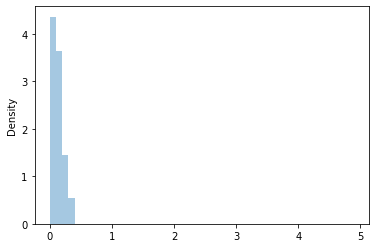

In [17]:
import seaborn as sns

div = 5/50
bins = [i*div for i in range(50)]
ax.set_xlim(-100,1000)
y = IPIs
y = [np.log10(val) for val in y ]
f,ax= plt.subplots ()
sns.distplot(y,bins=bins,ax=ax,norm_hist=False,
             kde=True)

In [18]:
get_intermealinterval([0,1,2,3,5,7,9,13,15])

1.875

In [19]:
for mouse in PRFF:
    IMI= get_intermealinterval (mouse)
    print (IMI)
    
    

0.30308006535947696
0.3161212998712999
0.27009471766848797
0.30469542362399493
0.2675567356572261
0.22796219455970468
0.4457945205479456
0.551035097597598
0.3351008018327611
0.44670776255707767
0.2848606254856254
0.31129807692307715


In [20]:
for mouse in NRFF:
    IMI= get_intermealinterval (mouse)
    print (IMI)

0.4507708333333333
0.4421192854980318
0.4026645833333339
0.46078440656565695
0.35742994100295
0.37571812596006143
0.5181201956673659
0.4636899188514358
0.46933779051257557
0.4414431075460492
0.3625686846584002
0.3555747126436783


In [21]:
for mouse in GRAINFF:
    IMI= get_intermealinterval (mouse)
    print (IMI)

0.29319564176245194
0.32272222222222213
0.30599049707602344
0.25910008322929684
0.5234819121447029
0.297311827956989
0.40596318211702814
0.3958606294155427
0.3049902534113059
0.3679469373219374
0.337290305010893
0.35282763532763534


In [22]:
for mouse in RICHECO:
    IMI= get_intermealinterval (mouse)
    print (IMI)

1.6044002525252523
0.6701190476190476
3.8389043209876537
0.7999500624219728
1.0936709401709404
1.1667759562841526
0.6787101210121013
0.3126194067370538
1.3669444444444445
0.528733164983165
0.7559208937198069
0.6076449275362319


In [23]:
for mouse in PRECO:
    IMI= get_intermealinterval (mouse)
    print (IMI)

0.3280542575285566
0.33652173913043504
0.295828645100797
0.3471346469622332
0.3485632183908048
0.25028571428571433
0.31658766564729873
0.27673189383715713
0.30123172514619884
0.28969292076887004
0.31058683683683685
0.30918410563029397


In [24]:
for mouse in NRFR1:
    IMI= get_intermealinterval (mouse)
    print (IMI)

0.5674652777777777
0.400450191570881
0.4620888888888889
0.47627371273712726
0.42557158119658095
0.389373822975518


In [25]:
for mouse in NRFR1R:
    IMI= get_intermealinterval (mouse)
    print (IMI)

0.658611111111111
0.4062816764132552
0.5989031339031339
0.3138850308641975
0.5030736714975846
0.34843589743589737


In [26]:
for mouse in PRFR1:
    IMI= get_intermealinterval (mouse)
    print (IMI)

0.5674652777777777
0.400450191570881
0.4620888888888889
0.47627371273712726
0.42557158119658095
0.389373822975518


In [27]:
for mouse in PRFR1R:
    IMI= get_intermealinterval (mouse)
    print (IMI)

0.658611111111111
0.4062816764132552
0.5989031339031339
0.3138850308641975
0.5030736714975846
0.34843589743589737


In [28]:
def get_mealsize(pellettimes):
    """
    calculates meal size from times of pellets
    parameters 
    ----------
    pellettimes : list of floats
        timestamps of pellet deliveries

    returns
    --------
    mealsize : float 
        mean size of meal in pellets 
    """

        
    npellets = len(pellettimes)
    IPIs = np.diff(pellettimes)
    nmeals = len([idx for idx, val in enumerate(IPIs) if val > 1/60])
    mealsize = npellets/nmeals

    return mealsize
    

In [29]:
PRFF [0]
get_mealsize (PRFF [0])


2.5441176470588234

In [30]:
NRFF [0]
get_mealsize (NRFF [0])

4.461111111111111

In [31]:
GRAINFF [0]
get_mealsize (GRAINFF [0])

3.6293103448275863

In [32]:
RICHECO [0]
get_mealsize (RICHECO [0])

1.1136363636363635

In [33]:
PRECO [0]
get_mealsize (PRECO [0])

1.4906542056074767

In [34]:
NRFR1 [0]
get_mealsize (NRFR1 [0])

3.975

In [35]:
NRFR1R [0]
get_mealsize (NRFR1R [0])

5.529411764705882

In [36]:
PRFR1 [0]
get_mealsize (PRFR1 [0])

3.975

In [37]:
PRFR1R [0]
get_mealsize (PRFR1R [0])

5.529411764705882

In [38]:
get_mealsize?

Signature: get_mealsize(pellettimes)
Docstring:
calculates meal size from times of pellets
parameters 
----------
pellettimes : list of floats
    timestamps of pellet deliveries

returns
--------
mealsize : float 
    mean size of meal in pellets 
File:      c:\users\hta031\github\fedprotein\<ipython-input-28-806c738524ca>
Type:      function


In [51]:
PR_mealsize=[]
NR_mealsize=[]
GRAIN_mealsize=[]

for mouse in GRAINFF:
    mealsize= get_mealsize (mouse)
    
    GRAIN_mealsize.append(mealsize)



for mouse in PRFF:
    mealsize= get_mealsize (mouse)
    
    PR_mealsize.append(mealsize)

    
print ("##################")    

    
    
for mouse in NRFF:
    mealsize= get_mealsize (mouse)
    NR_mealsize.append(mealsize)

print (GRAIN_mealsize)

print ("###############")

    
print (PR_mealsize)
    

print ("################")

print (NR_mealsize)

##################
[3.6293103448275863, 3.358139534883721, 3.1184210526315788, 2.902621722846442, 5.542635658914729, 3.638709677419355, 4.538461538461538, 4.473988439306359, 3.0921052631578947, 4.455128205128205, 3.926470588235294, 3.533333333333333]
###############
[2.5441176470588234, 2.675675675675676, 2.6885245901639343, 2.7810760667903525, 2.5392156862745097, 2.060857538035961, 3.5013698630136987, 3.679054054054054, 2.975257731958763, 3.5424657534246577, 2.452797202797203, 3.1615384615384614]
################
[4.461111111111111, 3.5885558583106265, 4.965, 4.857954545454546, 3.911504424778761, 3.2327188940092166, 4.135220125786163, 3.6376404494382024, 3.805157593123209, 3.783422459893048, 3.0043763676148796, 3.0797413793103448]


Text(0.5, 0, 'Diet')

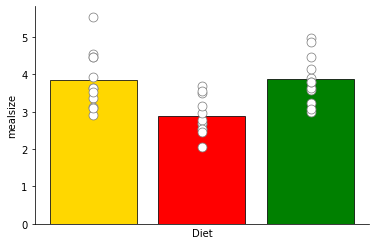

In [64]:
import matplotlib.pyplot as plt
f,ax= plt.subplots ()
tp.barscatter([GRAIN_mealsize,PR_mealsize, NR_mealsize], ax=ax, barfacecolor= ["gold","red", "green"],barfacecoloroption= "individual")
ax.set_ylabel("mealsize")
ax.set_xlabel("Diet")

In [65]:
f.savefig("C:\\Users\\hta031\OneDrive - UiT Office 365\\Documents\\People\\Hamid\\Presentations\\SSIB2022\\Poster\\Fig\\mealsize.eps")

In [41]:
tp.barscatter?

Signature:
tp.barscatter(
    data,
    transpose=False,
    groupwidth=0.75,
    barwidth=0.8,
    paired=False,
    unequal=False,
    spaced=False,
    yspace=20,
    xspace=0.1,
    barfacecoloroption='same',
    barfacecolor=['white'],
    baredgecoloroption='same',
    baredgecolor=['black'],
    baralpha=1,
    scatterfacecoloroption='same',
    scatterfacecolor=['white'],
    scatteredgecoloroption='same',
    scatteredgecolor=['grey'],
    scatterlinecolor='grey',
    scattersize=80,
    scatteralpha=1,
    spreadscatters=False,
    linewidth=0.75,
    xlim=[],
    ylim=[],
    ylabel='none',
    xlabel='none',
    grouplabel='auto',
    itemlabel='none',
    barlabels=[],
    barlabeloffset=0.025,
    grouplabeloffset=0,
    yaxisparams='auto',
    show_legend='none',
    legendloc='upper right',
    xfontsize=8,
    ax=[],
)
Docstring:
Description: Creates a bar graph with data points shown as overlaid circles.

Args:
    data - Required. Should be a list (or list of lists) 

Text(0.5, 0, 'Diet')

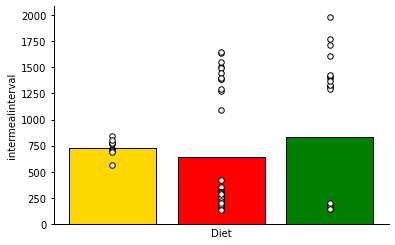

In [70]:
f,ax= plt.subplots ()
tp.barscatter([GRAIN,PR,NR], ax=ax, barfacecolor= ["gold", "red", "green"],barfacecoloroption= "individual", linewidth=1, scattersize=30, scatteredgecolor="k")
ax.set_ylabel("intermealinterval")
ax.set_xlabel("Diet")


In [67]:
f.savefig("C:\\Users\\hta031\OneDrive - UiT Office 365\\Documents\\People\\Hamid\\Presentations\\SSIB2022\\Poster\\Fig\\intermealinterval.eps")

[3.6293103448275863, 3.358139534883721, 3.1184210526315788, 2.902621722846442, 5.542635658914729, 3.638709677419355]
##################
[2.5441176470588234, 2.675675675675676, 2.6885245901639343, 2.7810760667903525, 2.5392156862745097, 2.060857538035961]
##################
[4.461111111111111, 3.5885558583106265, 4.965, 4.857954545454546, 3.911504424778761, 3.2327188940092166]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


Text(0.5, 0, 'Diet')

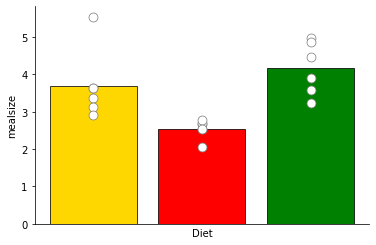

In [116]:
PRNRFF1=[]
for row in metafilerows:
    if row [2] == "PR":
        if row[5] == 2:
            if row[3] =="FF":
                filename = row[0]
                x= get_FEDevents ("data\\{}".format(filename) , "Pellet")
                PRNRFF1.append(x)
    
GRAINFFPRNR=[]
for row in metafilerows:
    if row [2] == "GRAIN":
        if row[5] == 2:
            if row[3] =="FF":
                filename = row[0]
                x= get_FEDevents ("data\\{}".format(filename) , "Pellet")
                GRAINFFPRNR.append(x)
            
PRNRFF2=[]
for row in metafilerows:
    if row[2] == "NR":
        if row[5] == 2:
            if row[3] =="FF":
                filename = row[0]
                x= get_FEDevents ("data\\{}".format(filename) , "Pellet")
                PRNRFF2.append(x)          

    
            
            



PRNRFF1_mealsize=[]
PRNRFF2_mealsize=[]
GRAINFFPRNR_mealsize=[]

for mouse in GRAINFFPRNR:
    mealsize= get_mealsize (mouse)
    
    GRAINFFPRNR_mealsize.append(mealsize)

print (GRAINFFPRNR_mealsize)
print ("##################")

for mouse in PRNRFF1:
    mealsize= get_mealsize (mouse)
    
    PRNRFF1_mealsize.append(mealsize)

print (PRNRFF1_mealsize)    
print ("##################")    

    
    
for mouse in PRNRFF2:
    mealsize= get_mealsize (mouse)
    PRNRFF2_mealsize.append(mealsize)
    
print (PRNRFF2_mealsize)

print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")

import matplotlib.pyplot as plt
f,ax= plt.subplots ()
tp.barscatter([GRAINFFPRNR_mealsize,PRNRFF1_mealsize, PRNRFF2_mealsize], ax=ax, barfacecolor= ["gold","red", "green"],barfacecoloroption= "individual")
ax.set_ylabel("mealsize")
ax.set_xlabel("Diet")

[4.538461538461538, 4.473988439306359, 3.0921052631578947, 4.455128205128205, 3.926470588235294, 3.533333333333333]
##################
[4.135220125786163, 3.6376404494382024, 3.805157593123209, 3.783422459893048, 3.0043763676148796, 3.0797413793103448]
##################
[3.5013698630136987, 3.679054054054054, 2.975257731958763, 3.5424657534246577, 2.452797202797203, 3.1615384615384614]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


Text(0.5, 0, 'Diet')

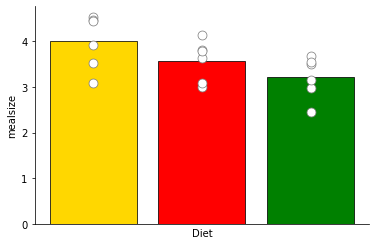

In [131]:
NRPRFF1=[]
for row in metafilerows:
    if row [2] == "NR":
        if row[5] == 1:
            if row[3] =="FF":
                filename = row[0]
                x= get_FEDevents ("data\\{}".format(filename) , "Pellet")
                NRPRFF1.append(x)
    
GRAINFFNRPR=[]
for row in metafilerows:
    if row [2] == "GRAIN":
        if row[5] == 1:
            if row[3] =="FF":
                filename = row[0]
                x= get_FEDevents ("data\\{}".format(filename) , "Pellet")
                GRAINFFNRPR.append(x)
            
NRPRFF2=[]
for row in metafilerows:
    if row[2] == "PR":
        if row[5] == 1:
            if row[3] =="FF":
                filename = row[0]
                x= get_FEDevents ("data\\{}".format(filename) , "Pellet")
                NRPRFF2.append(x)          

    
            
            



NRPRFF1_mealsize=[]
NRPRFF2_mealsize=[]
GRAINFFNRPR_mealsize=[]

for mouse in GRAINFFNRPR:
    mealsize= get_mealsize (mouse)
    
    GRAINFFNRPR_mealsize.append(mealsize)

print (GRAINFFNRPR_mealsize)
print ("##################")

for mouse in NRPRFF1:
    mealsize= get_mealsize (mouse)
    
    NRPRFF1_mealsize.append(mealsize)

print (NRPRFF1_mealsize)    
print ("##################")    

    
    
for mouse in NRPRFF2:
    mealsize= get_mealsize (mouse)
    NRPRFF2_mealsize.append(mealsize)
    
print (NRPRFF2_mealsize)

print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")

import matplotlib.pyplot as plt
f,ax= plt.subplots ()
tp.barscatter([GRAINFFNRPR_mealsize,NRPRFF1_mealsize, NRPRFF2_mealsize], ax=ax, barfacecolor= ["gold","red", "green"],barfacecoloroption= "individual")
ax.set_ylabel("mealsize")
ax.set_xlabel("Diet")

Text(0.5, 0, 'Diet')

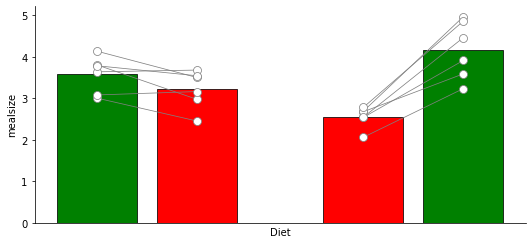

In [226]:


import matplotlib.pyplot as plt
f,ax= plt.subplots ()



ax,barx,barlist, sclist= tp.barscatter([[NRPRFF1_mealsize,NRPRFF2_mealsize],[PRNRFF1_mealsize,PRNRFF2_mealsize ]], ax=ax, barfacecolor= ["green", "red","red", "green"],barfacecoloroption= "individual", paired = True)
ax.set_ylabel("mealsize")
ax.set_xlabel("Diet")

In [229]:
dir (barlist [2]) 

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_label',
 '_oid',
 '_propobservers',
 '_remove_method',
 'add_callback',
 'count',
 'errorbar',
 'eventson',
 'get_children',
 'get_label',
 'index',
 'patches',
 'pchanged',
 'remove',
 'remove_callback',
 'set_label',
 'stale']

In [224]:
f.savefig("C:\\Users\\hta031\OneDrive - UiT Office 365\\Documents\\People\\Hamid\\Presentations\\SSIB2022\\Poster\\Fig\\mealsizedynamics.eps")

<BarContainer object of 6 artists>

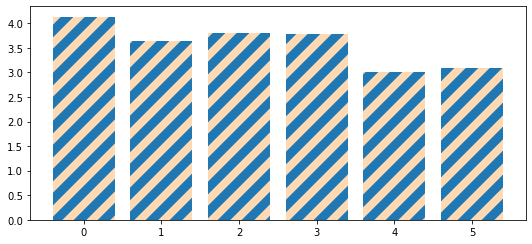

In [214]:
plt.bar(range (len(NRPRFF1_mealsize)), NRPRFF1_mealsize, hatch = "/")

In [225]:
tp.barscatter?

Signature:
tp.barscatter(
    data,
    transpose=False,
    groupwidth=0.75,
    barwidth=0.8,
    paired=False,
    unequal=False,
    spaced=False,
    yspace=20,
    xspace=0.1,
    barfacecoloroption='same',
    barfacecolor=['white'],
    baredgecoloroption='same',
    baredgecolor=['black'],
    baralpha=1,
    scatterfacecoloroption='same',
    scatterfacecolor=['white'],
    scatteredgecoloroption='same',
    scatteredgecolor=['grey'],
    scatterlinecolor='grey',
    scattersize=80,
    scatteralpha=1,
    spreadscatters=False,
    linewidth=0.75,
    xlim=[],
    ylim=[],
    ylabel='none',
    xlabel='none',
    grouplabel='auto',
    itemlabel='none',
    barlabels=[],
    barlabeloffset=0.025,
    grouplabeloffset=0,
    yaxisparams='auto',
    show_legend='none',
    legendloc='upper right',
    xfontsize=8,
    ax=[],
)
Docstring:
Description: Creates a bar graph with data points shown as overlaid circles.

Args:
    data - Required. Should be a list (or list of lists) 